# Proyek Analisis Data : E-Commerce Public Dataset


* Nama : Anggita Ramadhani
* Email : anggitaramadhani81@gmail.com
* ID Dicoding : anggita1999

## Menentukan Pertanyaan Bisnis


* Produk kategori mana yang paling diminati dan yang paling jarang terjual?

* Bagaimana tren penjualan perusahaan dalam setiap kuartal? Apakah terjadi peningkatan yang signifikan atau penurunan?

* Di negara bagian mana aktivitas pemesanan paling tinggi?

* Pelanggan dengan index berapa yang melakukan transaksi paling baru atau terakhir?

* Berapa frekuensi tertinggi dari pembelian produk yang dilakukan oleh seorang pelanggan?

* Berapa total nilai belanja tertinggi yang dihabiskan oleh seorang pelanggan?

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
customer_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv")
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
order_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_payment_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_item_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv")
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_review_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
product_category_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
product_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
seller_df = pd.read_csv("/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [12]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [13]:
geolocation_df.duplicated().sum()

261831

In [14]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
customer_df.duplicated().sum()

0

In [17]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [18]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [19]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
order_df.duplicated().sum()

0

In [21]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [22]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
order_payment_df.duplicated().sum()

0

In [24]:
order_payment_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [25]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [26]:
order_item_df.duplicated().sum()

0

In [27]:
order_item_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [28]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
order_review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
order_review_df.duplicated().sum()

0

In [31]:
order_review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [33]:
product_category_df.duplicated().sum()

0

In [34]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [35]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [36]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [37]:
product_df.duplicated().sum()

0

In [38]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [39]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
seller_df.duplicated().sum()

0

In [41]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Dari Assessing Data diatas, dapat kita ketahui bahwa pada tabel:

* **Geolocation** :
1. Kolom *geolocation_zip_code_prefix* mempunyai tipe data int, sehingga akan diubah ke dalam tipe object, karena kolom tersebut bukan sesuatu yang dapat dihitung jadi tidak perlu menggunakan int.
2. Ada nilai duplikat sebesar 261831, jadi akan di drop.

* **Customers** :
1. Kolom *customer_zip_code_prefix* mempunyai tipe data int, sehingga akan diubah ke dalam tipe object, karena kolom tersebut bukan sesuatu yang dapat dihitung jadi tidak perlu menggunakan int.

* **Orders** :
1. Terdapat missing values di beberapa kolom seperti *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date* sehingga perlu dilakukan cleaning, saya memilih untuk melakukan drop kolom yang terdapat nilai NaN, untuk deep cleaning lebih lanjut mungkin bisa dilakukan imputation dengan menghubungkannya dengan kolom order status.
2. Kolom *order_purchase_timestamp* dan *order_estimated_delivery_date* mempunyai tipe data object, sehingga akan diubah menjadi datetime, karena merupakan format tanggal dan waktu.

* **Order Payments** :
1. Tidak ada yang perlu diperbaiki.

* **Order Items** :
1. Kolom *order_item_id* mempunyai tipe data int, sehingga akan diubah ke dalam tipe object, karena kolom tersebut bukan sesuatu yang dapat dihitung jadi tidak perlu menggunakan int.
2. Kolom *shipping_limit_date* mempunyai tipe data object, sehingga akan diubah menjadi datetime, karena merupakan format tanggal dan waktu.

* **Order Reviews** :
1. Kolom *review_creation_date* dan *review_answer_timestamp* mempunyai tipe data object, sehingga akan diubah menjadi datetime, karena merupakan format tanggal dan waktu.
2. Terdapat missing values di 2 kolom yaitu *review_comment_title* dan *review_comment_message* sehingga perlu dilakukan cleaning, saya melakukan imputation terhadap 2 kolom tersebut dengan nilai 'kosong'.

* **Product Category** :
1. Tidak ada yang perlu diperbaiki.

* **Product** :
1. Terdapat 2 missing values di kolom *product_weight_g*, *product_length_cm*, *product_height_cm*, *product_width_cm* sehingga perlu dilakukan cleaning, untuk baris yang tidak mempunyai *product_category_name* saya drop, sedangkan baris yang mempunyai nilai, saya isi dengan nilai mean pada product category name 'bebes'.
2. Terdapat missing values di beberapa kolom yaitu *product_category_name*, *product_name_lenght*, *product_description_lenght*, *product_photos_qty* sehingga perlu dilakukan cleaning, saya lakukan dropna, karena tidak terdapat nilai dari kategori produknya, sehingga tidak terlalu berarti.
3. Ubah nama kolom *product_name_lenght* menjadi *product_name_length* dan *product_description_lenght* menjadi *product_description_length*

* **Sellers** :
1. Kolom *seller_zip_code_prefix* mempunyai tipe data int, sehingga akan diubah ke dalam tipe object, karena kolom tersebut bukan sesuatu yang dapat dihitung jadi tidak perlu menggunakan int.

### Cleaning Data

In [42]:
# Mengubah tipe data kolom geolocation_zip_code_prefix menjadi object
geolocation_df['geolocation_zip_code_prefix'] = geolocation_df['geolocation_zip_code_prefix'].astype(str)

In [43]:
# Cek apakah sudah berubah
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  object 
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), object(3)
memory usage: 38.2+ MB


In [44]:
# Drop Duplicate
geolocation_df.drop_duplicates(inplace=True)

In [45]:
# Cek apakah sudah terhapus duplikatnya
geolocation_df.duplicated().sum()

0

In [46]:
# Mengubah tipe data kolom customer_zip_code_prefix menjadi object
customer_df['customer_zip_code_prefix'] = customer_df['customer_zip_code_prefix'].astype(str)

In [47]:
# Cek apakah sudah berubah
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  object
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [48]:
# Menghapus kolom yang terdapat missing values, karena selain saya tidak akan memanfaatkan kolom tersebut,
# kalau yang dihapus data NULL nya, akan kehilangan banyak variasi pada kolom order status
order_df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=1, inplace=True)

In [49]:
# Cek apakah masih ada nilai NULL
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [50]:
# Mengubah tipe data beberapa kolom menjadi datetime
datetime_columns = ["order_purchase_timestamp", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [51]:
# Cek apakah sudah berubah
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 3.8+ MB


In [52]:
# Mengubah tipe data kolom order_item_id menjadi object
order_item_df['order_item_id'] = order_item_df['order_item_id'].astype(str)

In [53]:
# Mengubah tipe data kolom shipping_limit_date menjadi datetime
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])

In [54]:
# Cek apakah sudah berubah
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [55]:
# Mengubah tipe data kolom review_creation_date menjadi datetime
order_review_df['review_creation_date'] = pd.to_datetime(order_review_df['review_creation_date'])

# Mengubah tipe data kolom review_answer_timestamp menjadi datetime
order_review_df['review_answer_timestamp'] = pd.to_datetime(order_review_df['review_answer_timestamp'])

In [56]:
# Cek apakah sudah berubah
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [57]:
# Melakukan imputasi ke kolom review_comment_title dengan value 'kosong'
order_review_df['review_comment_title'].fillna('kosong', inplace=True)

# Melakukan imputasi ke kolom review_comment_message dengan value 'kosong'
order_review_df['review_comment_message'].fillna('kosong', inplace=True)

In [58]:
# Cek apakah masih ada nilai NULL
order_review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [59]:
# Cek nilai NULL pada beberapa kolom
product_df[product_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Buat variabel bebes_df untuk membuat perhitungan rata2 dari product category bebes
bebes_df = product_df[product_df['product_category_name'] == 'bebes']

In [61]:
# Buat variabel mean_values untuk mencari nilai rata2 dari beberapa kolom
mean_values = bebes_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].mean()
mean_values

product_weight_g     3655.201525
product_length_cm      37.147059
product_height_cm      21.617647
product_width_cm       28.717865
dtype: float64

In [62]:
# Mengisi value NULL pada product id 09ff539a621711667c43eba6a3bd8466 dengan nilai rata2 dari produk kategori 'bebes'
product_df.loc[product_df['product_id'] == '09ff539a621711667c43eba6a3bd8466', ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = product_df.loc[product_df['product_id'] == '09ff539a621711667c43eba6a3bd8466', ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].fillna(value=mean_values).round()

In [63]:
# Cek nilai kembali nilai NULL pada beberapa kolom, karena dari hasil ini product_category_name juga NULL, maka akan saya drop
product_df[product_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# Cek lagi Nilai NULL, hasil dibawah ini semuanya tidak mempunyai product_category_name sehingga akan saya drop semua
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                1
product_length_cm               1
product_height_cm               1
product_width_cm                1
dtype: int64

In [65]:
# Drop kolom yang mempunyai nilai NULL
product_df.dropna(inplace=True)

In [66]:
# Ubah nama kolom
new_column_names = {'product_name_lenght': 'product_name_length',
                    'product_description_lenght': 'product_description_length'}
product_df.rename(columns=new_column_names, inplace=True)

In [67]:
# Cek apakah nama kolom sudah berubah
product_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32341 non-null  float64
 6   product_length_cm           32341 non-null  float64
 7   product_height_cm           32341 non-null  float64
 8   product_width_cm            32341 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [68]:
# Mengubah tipe data kolom seller_zip_code_prefix menjadi object
seller_df['seller_zip_code_prefix'] = seller_df['seller_zip_code_prefix'].astype(str)

In [69]:
# Cek apakah sudah berubah
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   object
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: object(4)
memory usage: 96.8+ KB


## Exploratory Data Analysis (EDA)

In [70]:
# Melakukan join table antara tabel product_df dengan tabel product_category_df
product_category = pd.merge(
    left=product_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_category.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [71]:
# Cek apakah ada nilai NULL
product_category.isna().sum()

product_id                        0
product_category_name             0
product_name_length               0
product_description_length        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
product_category_name_english    13
dtype: int64

In [72]:
# Melihat data yang mempunyai nilai NULL
product_category[product_category['product_category_name_english'].isna()]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1581,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5703,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7176,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7326,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8648,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
10823,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
13996,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
15875,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16609,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17460,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [73]:
# Mengisi nilai NaN pada kolom product_category_name_english dengan translate dari product_category_name
values_product_category = {
    'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_food_preparers',
    'pc_gamer': 'gaming_pc'
}

product_category['product_category_name_english'] = product_category['product_category_name_english'].fillna(product_category['product_category_name'].map(values_product_category))

In [74]:
# Cek apakah masih mempunyai nilai NULL
product_category.isna().sum()

product_id                       0
product_category_name            0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [75]:
# Kolom product_category_name_english digeser agar berada disamping product_category_name
product_category.insert(2, 'product_category_name_english', product_category.pop('product_category_name_english'))

In [76]:
# Melakukan join table antara tabel order_item_df dengan tabel product_category
item_product = pd.merge(
    left=order_item_df,
    right=product_category,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)
item_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [77]:
# Cek apakah ada nilai NULL
item_product.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [78]:
# Melakukan join table antara tabel order_df dengan tabel item_product
all_order = pd.merge(
    left=order_df,
    right=item_product,
    how="inner",
    left_on="order_id",
    right_on="order_id"
)
all_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,papelaria,stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [79]:
# Cek apakah ada nilai NULL
all_order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [80]:
# Melakukan join table antara tabel all_order dengan tabel customer
customer_order = pd.merge(
    left=all_order,
    right=customer_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,...,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,...,178.0,1.0,400.0,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,...,232.0,1.0,420.0,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,...,468.0,3.0,450.0,30.0,10.0,20.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,...,316.0,4.0,250.0,51.0,15.0,15.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [81]:
# Menambahkan kolom singkatan state ke nama lengkap state
state_mapping = {
    'SP': 'São Paulo',
    'RJ': 'Rio de Janeiro',
    'MG': 'Minas Gerais',
    'RS': 'Rio Grande do Sul',
    'PR': 'Paraná',
    'SC': 'Santa Catarina',
    'BA': 'Bahia',
    'DF': 'Distrito Federal',
    'GO': 'Goiás',
    'ES': 'Espírito Santo',
    'PE': 'Pernambuco',
    'CE': 'Ceará',
    'PA': 'Pará',
    'MT': 'Mato Grosso',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'PB': 'Paraíba',
    'PI': 'Piauí',
    'RN': 'Rio Grande do Norte',
    'AL': 'Alagoas',
    'SE': 'Sergipe',
    'TO': 'Tocantins',
    'RO': 'Rondônia',
    'AM': 'Amazonas',
    'AC': 'Acre',
    'AP': 'Amapá',
    'RR': 'Roraima'
}

# Tambahkan kolom 'detail_state'
customer_order['detail_state'] = customer_order['customer_state'].map(state_mapping)

In [82]:
# Menambahkan kolom customer_idx yang mana isinya index dari customer id
customer_order['customer_idx'] = customer_order.groupby('customer_id').ngroup()

In [83]:
# Cek apakah ada nilai NULL
customer_order.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
product_name_length              0
product_description_length       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
detail_state                     0
customer_idx                     0
dtype: int64

In [84]:
# Membuat dataframe untuk menghitung jumlah orderan berdasarkan kategori product
count_order_product = all_order.groupby(by=["product_category_name_english"]).agg({
    "order_item_id" : "count"
}).rename(columns={"order_item_id": "jumlah"}).reset_index().sort_values(by='jumlah', ascending=False)
count_order_product

,product_category_name_english,jumlah
7,bed_bath_table,11115
44,health_beauty,9670
67,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
...,...,...
11,cds_dvds_musicals,14
53,la_cuisine,14
42,gaming_pc,9
29,fashion_childrens_clothes,8


In [85]:
# Menggunakan resample dengan aturan 'Q' untuk per kuartal
quarterly_orders_df = customer_order.resample(rule='Q', on="order_purchase_timestamp").agg({
    "order_id" : "nunique"
})

# Mengubah indeks menjadi format yang diinginkan
quarterly_orders_df.index = quarterly_orders_df.index.to_period('Q').strftime('%Y-Q%q')

# Reset index
quarterly_orders_df = quarterly_orders_df.reset_index()

# Mengganti nama kolom
quarterly_orders_df.rename(columns={
    "order_id" : "order_count"
}, inplace=True)

# Menampilkan hasil
quarterly_orders_df

,order_purchase_timestamp,order_count
0,2016-Q3,3
1,2016-Q4,307
2,2017-Q1,5048
3,2017-Q2,9069
4,2017-Q3,12328
5,2017-Q4,17347
6,2018-Q1,20692
7,2018-Q2,19823
8,2018-Q3,12660


In [86]:
# Membuat dataframe untuk menghitung jumlah orderan berdasarkan nama statenya
count_state_customer = customer_order.groupby(by=["detail_state"]).agg({
    "order_id" : "nunique"
}).rename(columns={"order_id": "jumlah_order"}).reset_index().sort_values(by='jumlah_order', ascending=False)
count_state_customer.head(5)

,detail_state,jumlah_order
25,São Paulo,40811
20,Rio de Janeiro,12571
12,Minas Gerais,11378
19,Rio Grande do Sul,5353
13,Paraná,4928


In [87]:
# Membuat dataframe untuk menghitung jumlah product yang dibeli, jumlah revenue, dan selisih hari belanja terakhir customer
# dengan orderan terakhir dari data pada tiap customer
rfm_df = customer_order.groupby(by="customer_idx", as_index=False).agg({
    "order_purchase_timestamp" : "max", # Mengambil tanggal order terakhir
    "order_item_id" : "count", # Menghitung jumlah product yang dibeli
    "price" : "sum" # Menghitung jumlah revenue yang dihasilkan
})

# Mengganti nama kolom
rfm_df.columns = ["customer_idx", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = customer_order["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

# Menghapus kolom yang tidak diperlukan
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

In [88]:
# Menyusun DataFrame berdasarkan transaksi terakhirnya dari yang paling sedikit (jumlah harinya)
rfm_df.sort_values(by="recency", ascending=True).head()

,customer_idx,frequency,monetary,recency
28671,28671,1,145.0,0
87583,87583,2,418.0,5
31949,31949,1,99.0,5
41759,41759,1,45.9,5
75083,75083,1,65.0,5


In [89]:
# Menyusun DataFrame berdasarkan frekuensi pembelian product dari yang tertinggi
rfm_df.sort_values(by="frequency", ascending=False).head()

,customer_idx,frequency,monetary,recency
95854,95854,21,31.80,414
72286,72286,20,1974.00,376
72540,72540,20,2000.00,193
6382,6382,15,982.35,284
66172,66172,15,765.00,581


In [90]:
# Menyusun DataFrame berdasarkan jumlah uang yang dihabiskan oleh pelanggan dari yang tertinggi
rfm_df.sort_values(by="monetary", ascending=False).head()

,customer_idx,frequency,monetary,recency
8379,8379,8,13440.0,339
89987,89987,4,7160.0,50
75864,75864,1,6735.0,568
93062,93062,1,6729.0,40
24289,24289,1,6499.0,467


## Visualization & Explanatory Analysis

### Produk kategori mana yang paling diminati dan yang paling jarang terjual?

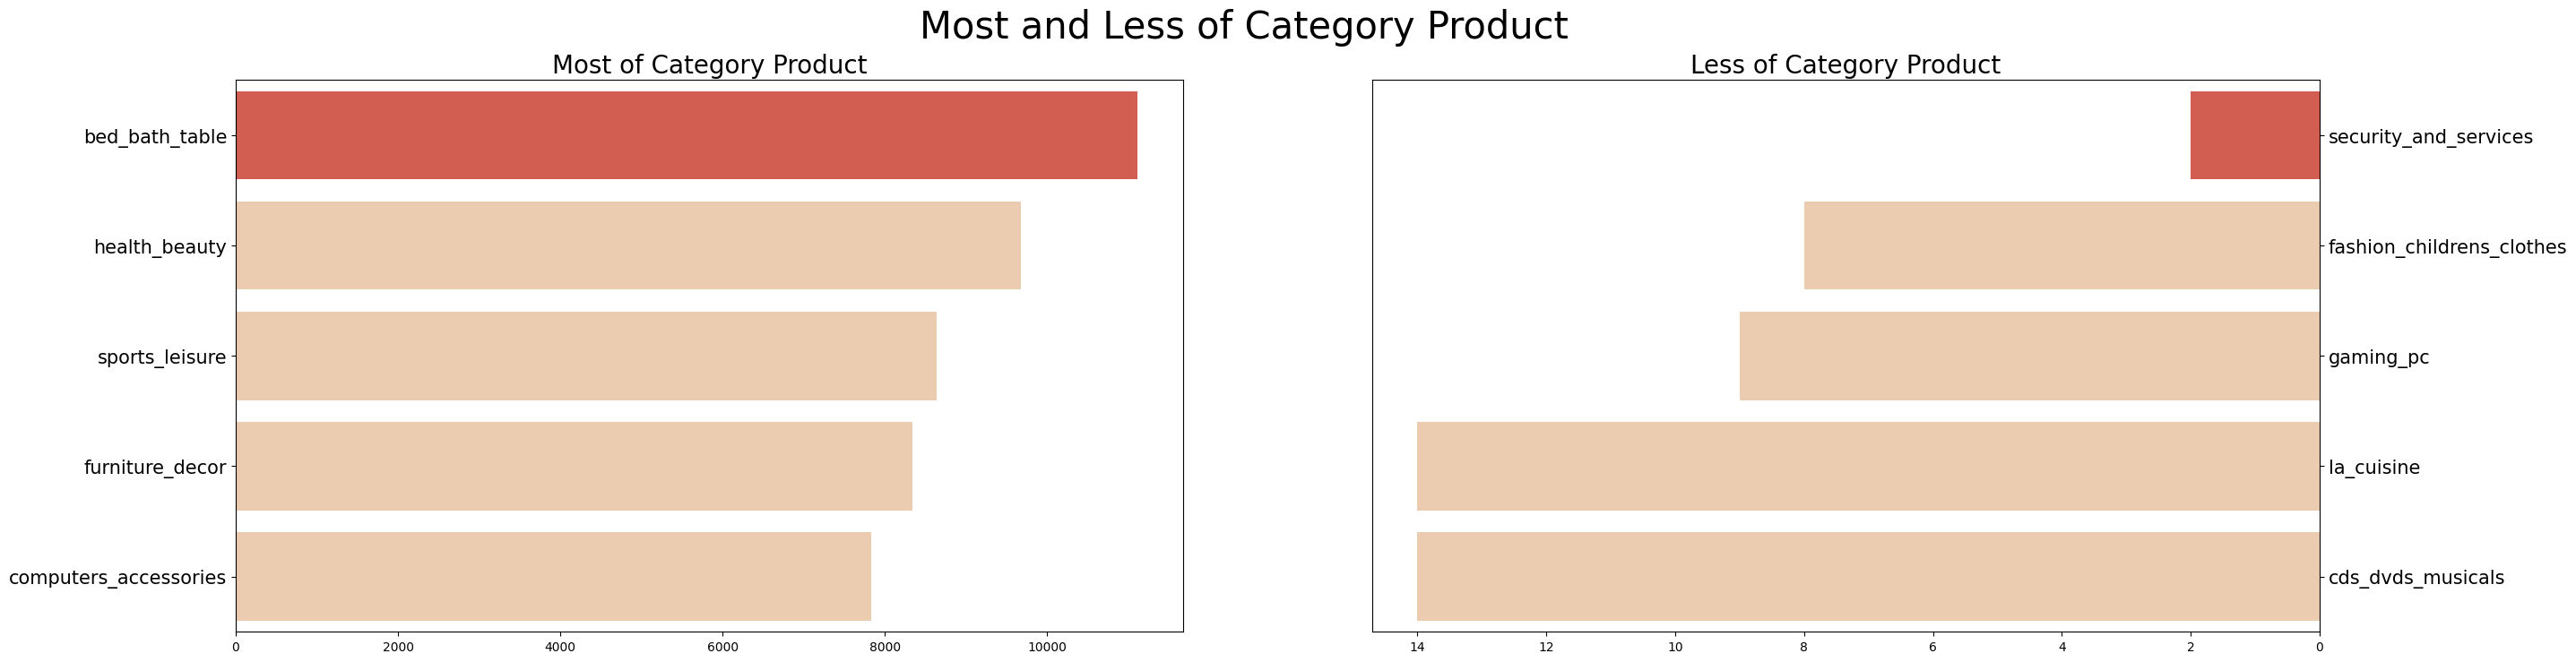

In [91]:
# Membuat subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# Warna yang akan digunakan dalam plot
colors = ["#E74C3C", "#F5CBA7", "#F5CBA7", "#F5CBA7", "#F5CBA7"]

# Plot pertama (Top 5 kategori terbanyak)
sns.barplot(x="jumlah", y="product_category_name_english", data=count_order_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most of Category Product", loc="center", fontsize=20)
ax[0].tick_params(axis="y", labelsize=15)

# Plot kedua (Top 5 kategori paling sedikit)
sns.barplot(x="jumlah", y="product_category_name_english", data=count_order_product.sort_values(by="jumlah", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Less of Category Product", loc="center", fontsize=20)
ax[1].tick_params(axis="y", labelsize=15)

# Menambahkan judul keseluruhan
plt.suptitle("Most and Less of Category Product", fontsize=30)

# Menampilkan plot
plt.show()

Dari grafik di atas dapat diketahui bahwa 5 kategori produk yang paling diminati adalah :

1. bed_bath_table dengan jumlah pesanan sebanyak 11115 item.
2. health_beauty dengan jumlah pesanan sebanyak 9670 item.
3. sport_leisure dengan jumlah pesanan sebanyak 8641 item.
4. furniture_decor dengan jumlah pesanan sebanyak 8334 item.
5. computers_accessories dengan jumlah pesanan sebanyak 7827 item.

Sementara itu, 5 kategori produk yang paling jarang diminati adalah :

1. security_and_services dengan jumlah pesanan sebanyak 2 item.
2. fashion_childrens_clothes dengan jumlah pesanan sebanyak 8 item.
3. gaming_pc dengan jumlah pesanan sebanyak 9 item.
4. la_cuisine dengan jumlah pesanan sebanyak 14 item.
5. cds_dvds_musicals dengan jumlah pesanansebanyak 14 item.


### Bagaimana tren penjualan perusahaan dalam setiap kuartal? Apakah terjadi peningkatan yang signifikan atau penurunan?

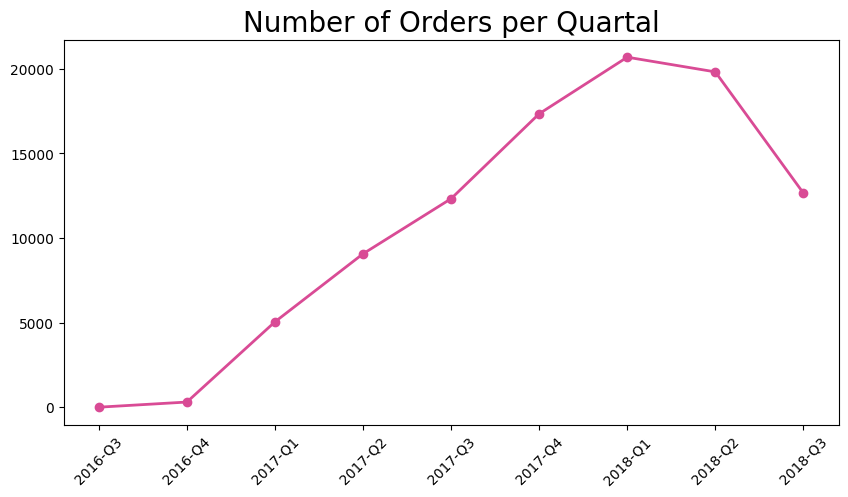

In [92]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(quarterly_orders_df["order_purchase_timestamp"], quarterly_orders_df["order_count"], marker='o', linewidth=2, color="#D94B95")

# Menambahkan judul
plt.title("Number of Orders per Quartal", loc="center", fontsize=20)

# Menampilkan label kuartal pada sumbu x dan y
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# Menampilkan plot
plt.show()

Dari grafik di atas, terlihat bahwa tren penjualan secara keseluruhan cenderung meningkat setiap kuartalnya. Namun, perlu dicatat bahwa terjadi penurunan signifikan pada kuartal kedua tahun 2018. Puncak pemesanan tercatat pada kuartal pertama tahun 2018, mencapai jumlah 20692 pesanan, sementara pemesanan terendah tercatat pada kuartal ketiga dengan hanya 3 pesanan.

### Di negara bagian mana aktivitas pemesanan paling tinggi?

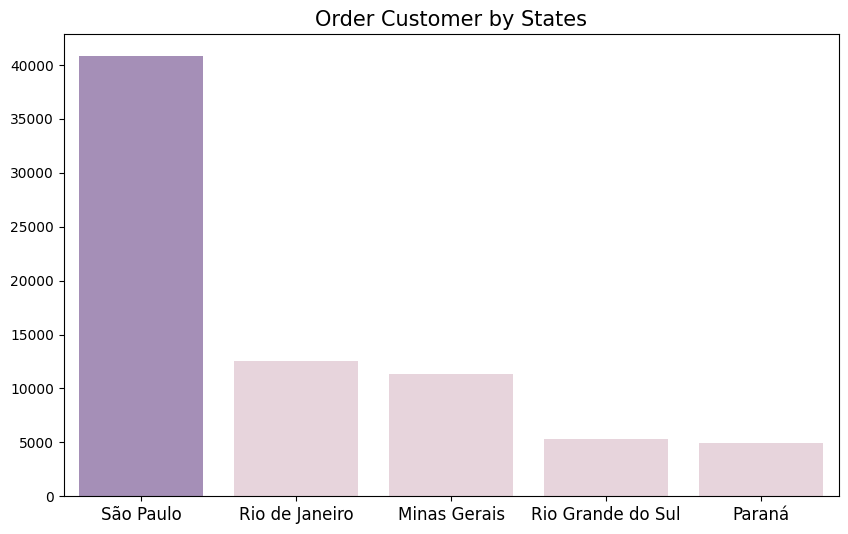

In [93]:
# Membuat subplot
plt.figure(figsize=(10, 6))

# Warna yang akan digunakan dalam plot
colors_ = ["#A688BE", "#EAD1DC", "#EAD1DC", "#EAD1DC", "#EAD1DC"]

# Membuat plot bar dan menyimpan objek sumbu ke dalam variabel ax
ax = sns.barplot(
    x="detail_state",
    y="jumlah_order",
    data=count_state_customer.head(5).sort_values(by="jumlah_order", ascending=False),
    palette=colors_
)

# Menambahkan judul
plt.title("Order Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.show()

Dari grafik di atas, terlihat bahwa aktivitas pemesanan mencapai puncak tertinggi di negara bagian São Paulo, dengan total pesanan sebanyak 40811 pesanan. Perbedaan ini sangat signifikan jika dibandingkan dengan negara bagian lainnya. Posisi kedua tertinggi ditempati oleh negara bagian Rio de Janeiro, dengan jumlah pesanan sebanyak 12571 pesanan, diikuti oleh Minas Gerais di urutan ketiga dengan total pesanan sebanyak 11378 pesanan.

###  Pelanggan dengan index berapa yang melakukan transaksi paling baru atau terakhir?

### Berapa frekuensi tertinggi dari pembelian produk yang dilakukan oleh seorang pelanggan?

### Berapa total nilai belanja tertinggi yang dihabiskan oleh seorang pelanggan?

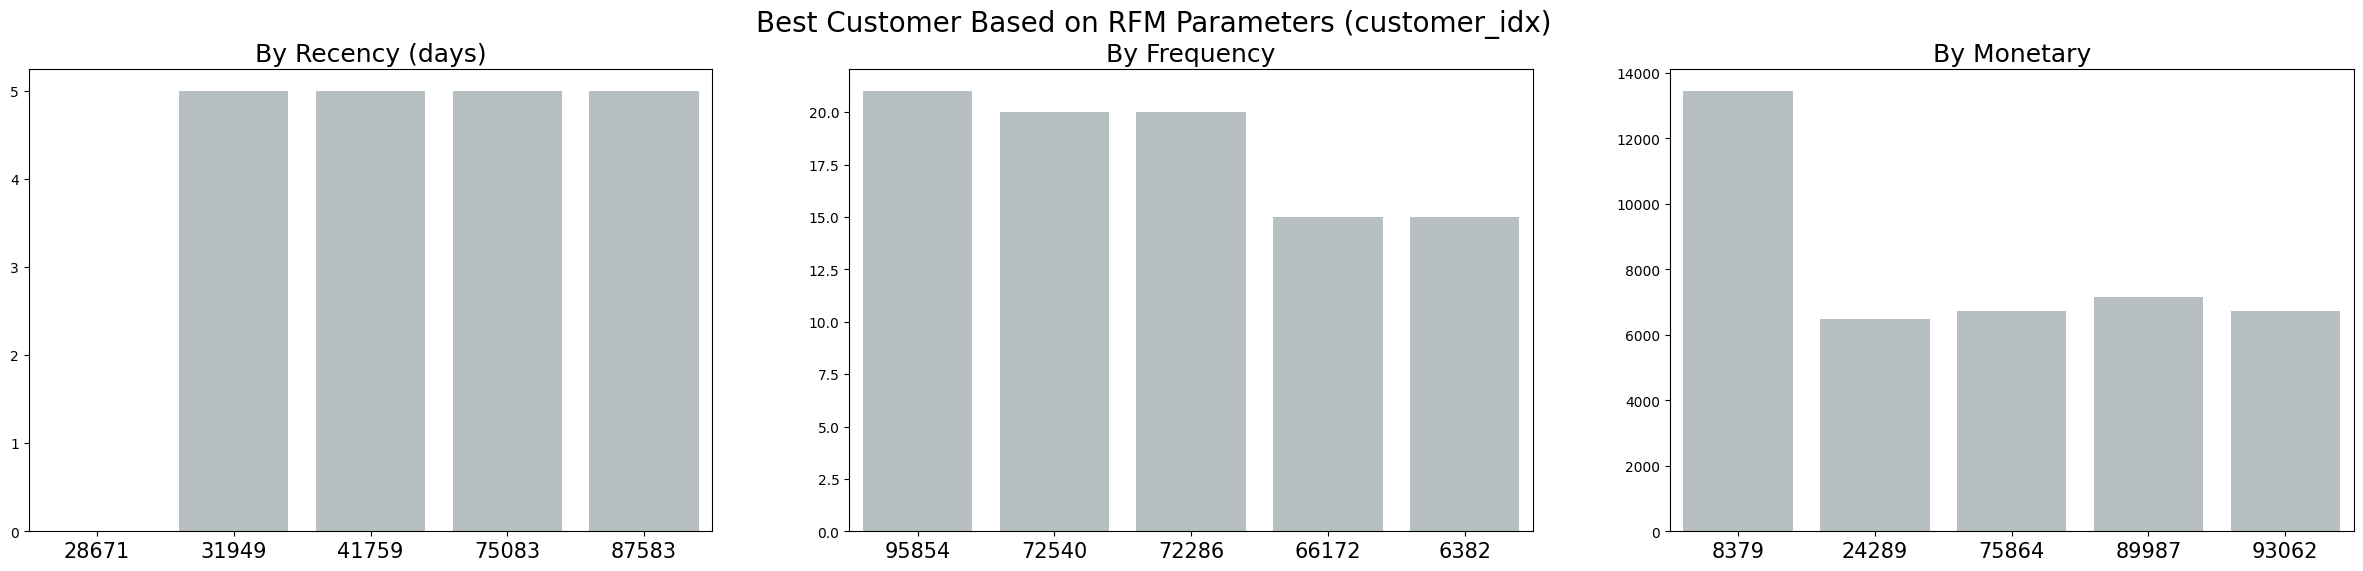

In [94]:
# Membuat subplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna yang akan digunakan dalam plot
colors = ["#B6C0C5", "#B6C0C5", "#B6C0C5", "#B6C0C5", "#B6C0C5"]

# Plot pertama (By Recency)
sns.barplot(y="recency", x="customer_idx", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Plot kedua (By Frequency)
sns.barplot(y="frequency", x="customer_idx", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot ketiga (By Monetary)
sns.barplot(y="monetary", x="customer_idx", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Menambahkan judul keseluruhan
plt.suptitle("Best Customer Based on RFM Parameters (customer_idx)", fontsize=20)

# Menampilkan plot
plt.show()

Dari ketiga grafik di atas, dapat diketahui bahwa :

1. Grafik Recency (days) : Pelanggan dengan indeks 28671 adalah pelanggan terbaru dalam data, karena transaksi terakhirnya terjadi 0 hari yang lalu. Sementara itu, pelanggan dengan indeks 31949, 41759, 75083, dan 87583 baru saja melakukan transaksi terakhirnya dalam rentang waktu 5 hari sebelum data terakhir.

2. Grafik Frequency : Pelanggan dengan indeks 95854 memimpin dalam jumlah pesanan dengan total 21 item. Diikuti oleh pelanggan dengan indeks 72540 dan 72286 yang masing-masing memiliki 20 item pesanan. Selanjutnya, pelanggan dengan indeks 66172 dan 6382 memiliki total pesanan sebanyak 15 item.

3. Grafik Monetary : Pelanggan dengan indeks 8379 memberikan kontribusi pendapatan tertinggi kepada perusahaan, mencapai nilai 13440. Posisi kedua ditempati oleh pelanggan dengan indeks 89987, yang memberikan pendapatan sebesar 7160. Selanjutnya, pelanggan dengan indeks 75864 menyumbang pendapatan sebesar 6735, dan seterusnya dapat dilihat pada grafik.



## Conclusion

* Kategori produk yang mendapat peminat tertinggi adalah *bed_bath_table*,
sementara yang paling jarang diminati adalah *security_and_services*.

* Terdapat tren peningkatan penjualan secara keseluruhan setiap kuartal, namun terjadi penurunan yang signifikan pada kuartal kedua tahun 2018.

* Aktivitas pemesanan mencapai puncak tertinggi di negara bagian São Paulo.

* Pelanggan dengan indeks 28671 merupakan pelanggan terakhir yang melakukan transaksi.

* Pelanggan dengan indeks 95854 memiliki frekuensi pembelian tertinggi, yaitu sebanyak 21 item produk.

* Pelanggan dengan indeks 8379 merupakan pelanggan yang menyumbangkan pendapatan (revenue) terbesar, yaitu sebesar 13440.

* Tabel yang saya gunakan hanya tabel Customer, Order, Order Item, Product Category, Product. Akan tetapi, semua tabel saya cantumkan dalam notebook ini, karena bisa dilakukan untuk analisis lain lebih lanjut.

In [97]:
# Menyimpan dataframe ke dalam csv
customer_order.to_csv("main_data.csv", index=False)